In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import scipy

df = pd.read_csv("C:/Users/nha98/Desktop/regression_practice/train.csv")
test_df = pd.read_csv("C:/Users/nha98/Desktop/regression_practice/test.csv")

In [70]:
## 학습 데이터를 head() 만 확인해보자

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [71]:
## 학습 데이터의 column type 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<Axes: >

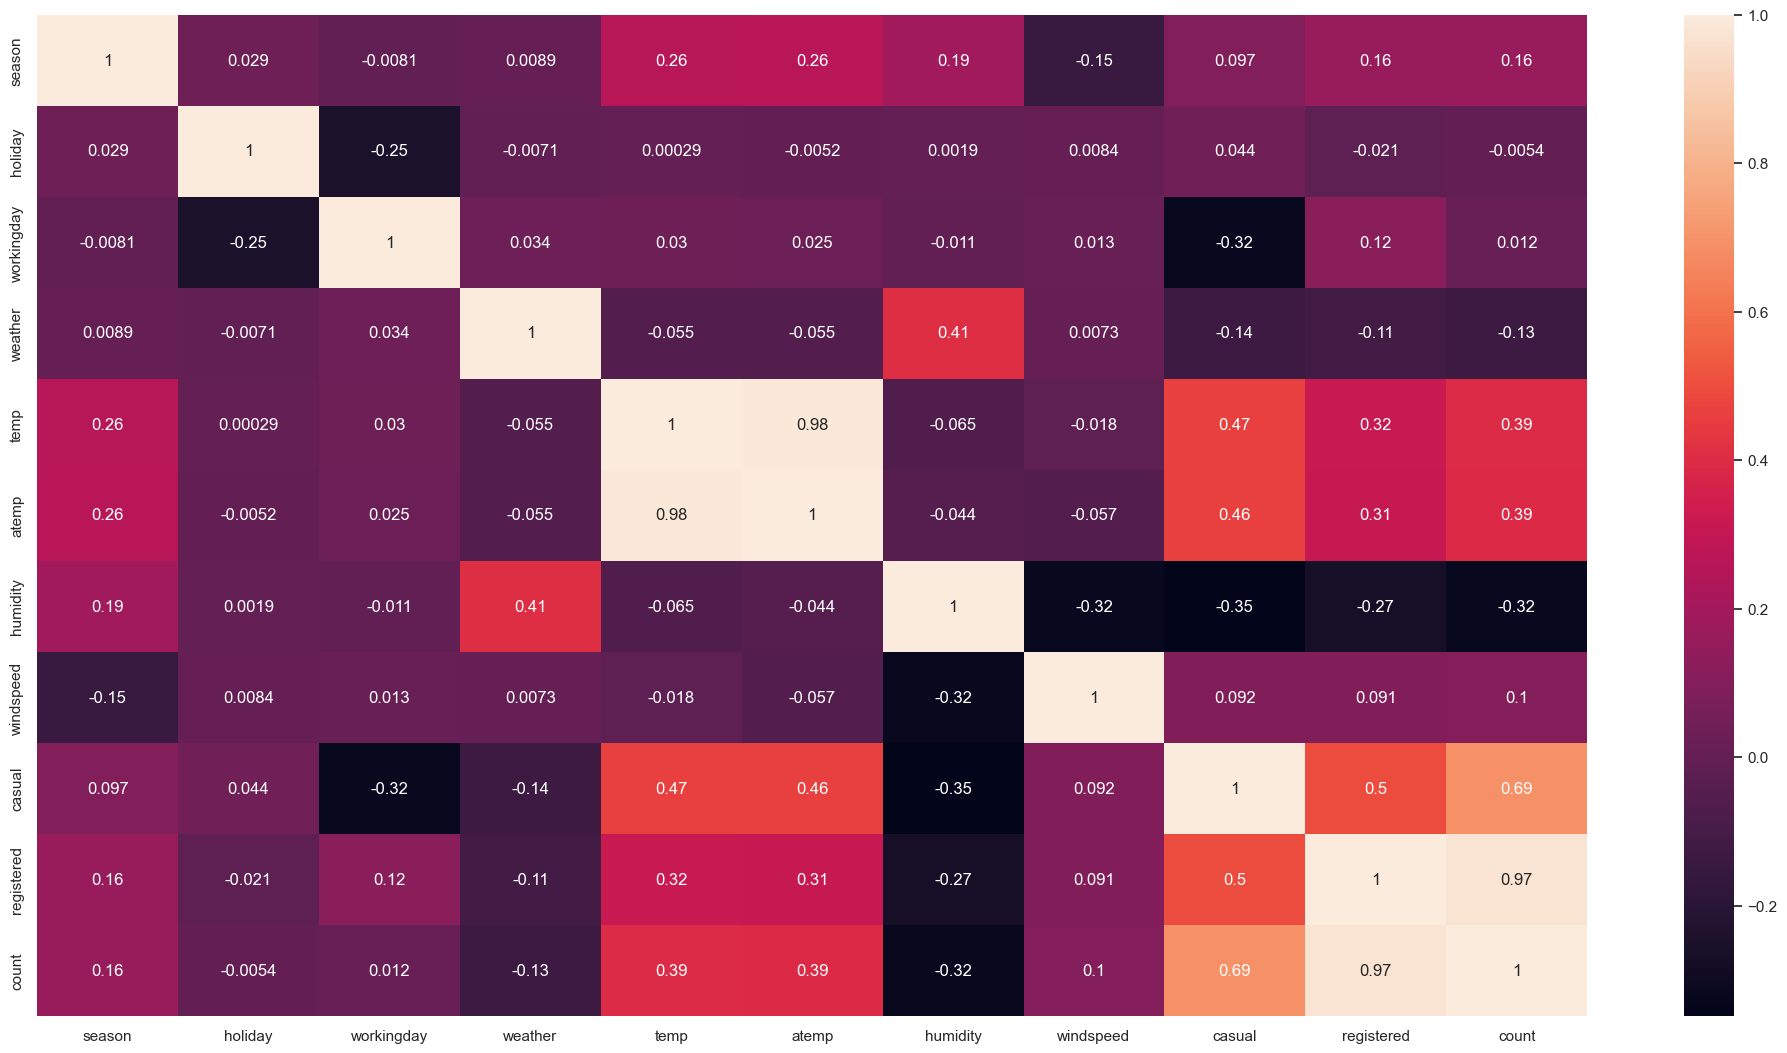

In [72]:
## EDA를 진행하여 column의 인사이트, 이상치, 결측치 처리 등 특성 공학 과정 수행

## 수치형 변수 간의 다중공선성 heatmap

sns.set(rc = {'figure.figsize' : (25, 13)})
sns.heatmap(df.corr(), annot = True)

In [73]:
## 자전거의 수요량이 어느정도가 되어야 할지 예측하는 문제
## 우선 날짜별로 변화 인사이트를 확인하기 위해 datetime type으로 처리하고
## 년도, 월, 일, 시간 단위로 쪼개서 column 추가
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

## dt.dayofweek -> 날짜의 요일을 반환
df['weekday'] = df['datetime'].dt.dayofweek

<Axes: xlabel='year', ylabel='count'>

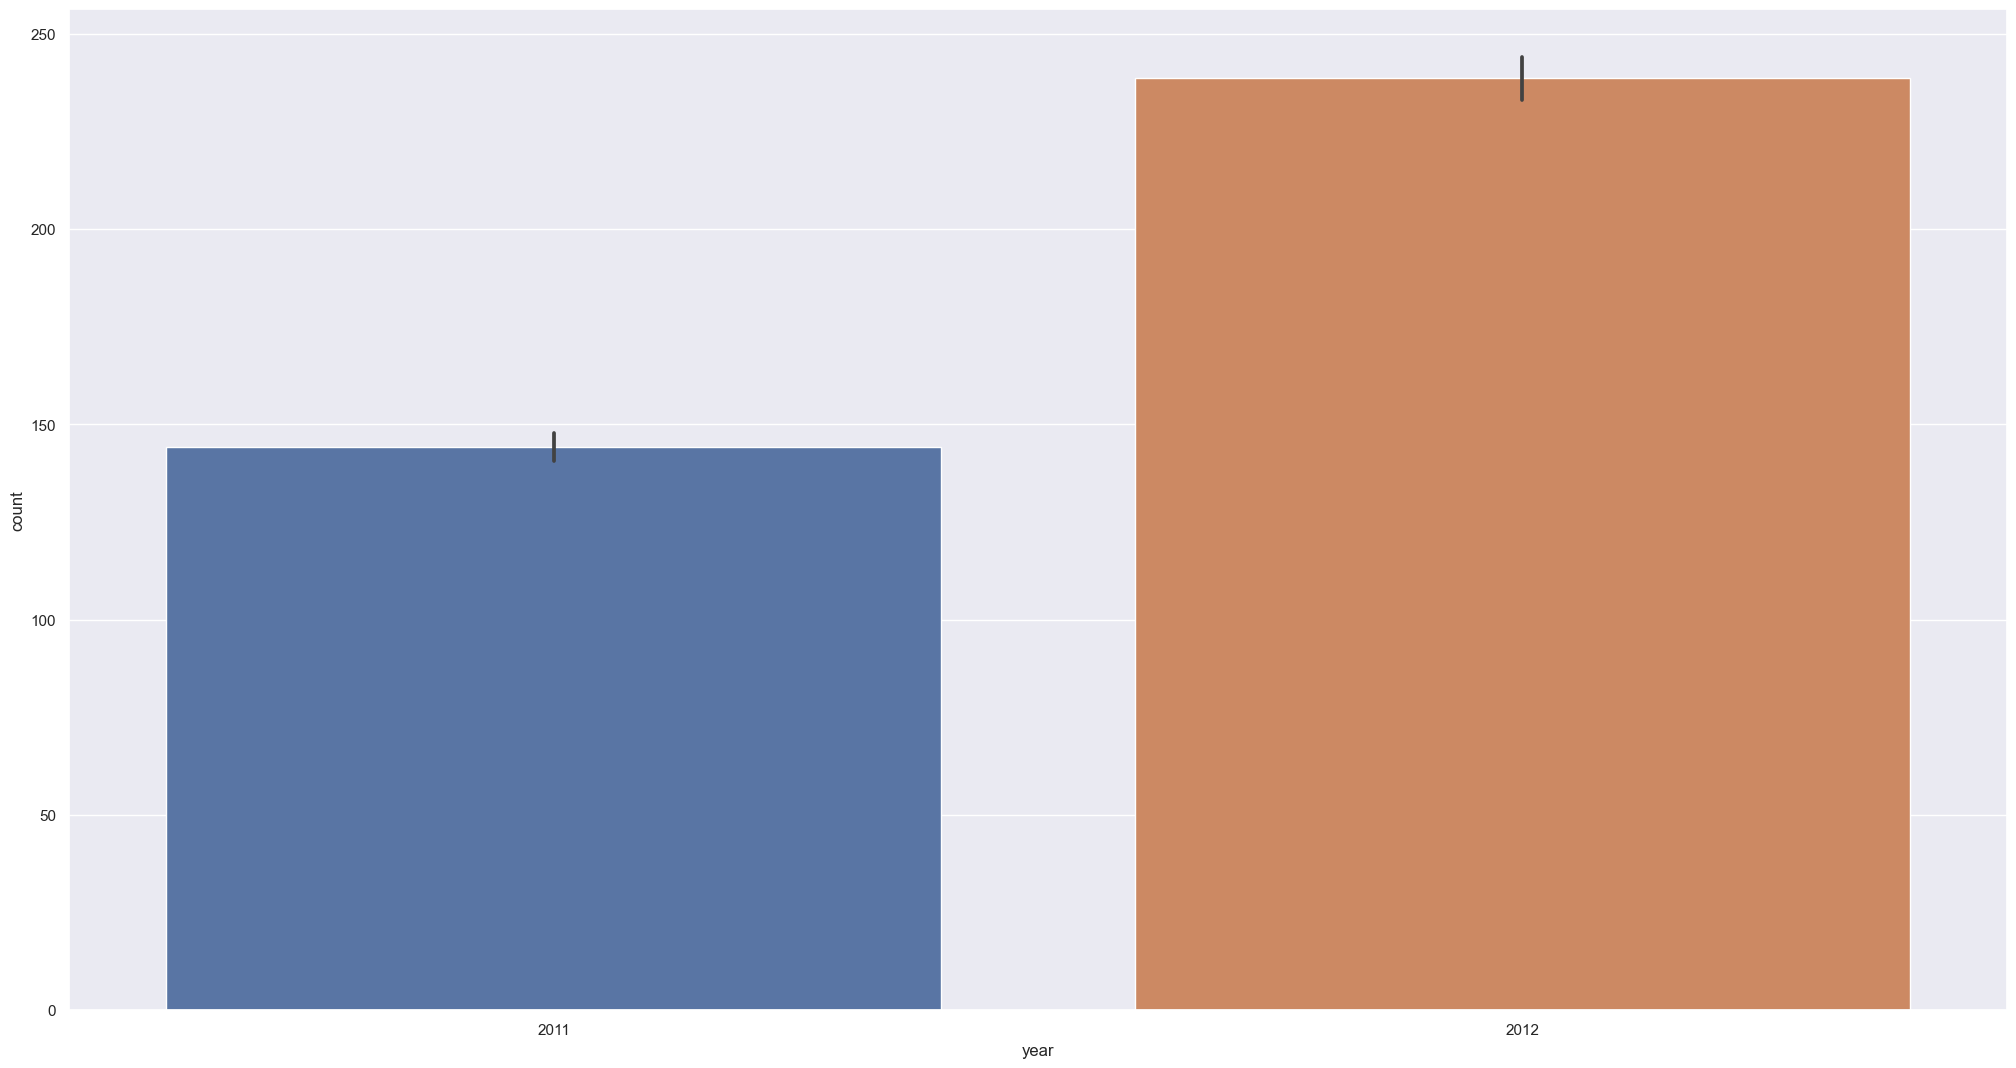

In [74]:
## 년 별 자전거 수요량을 plotting 해서 확인

sns.barplot(data = df, x = 'year', y = 'count')

<Axes: xlabel='month', ylabel='count'>

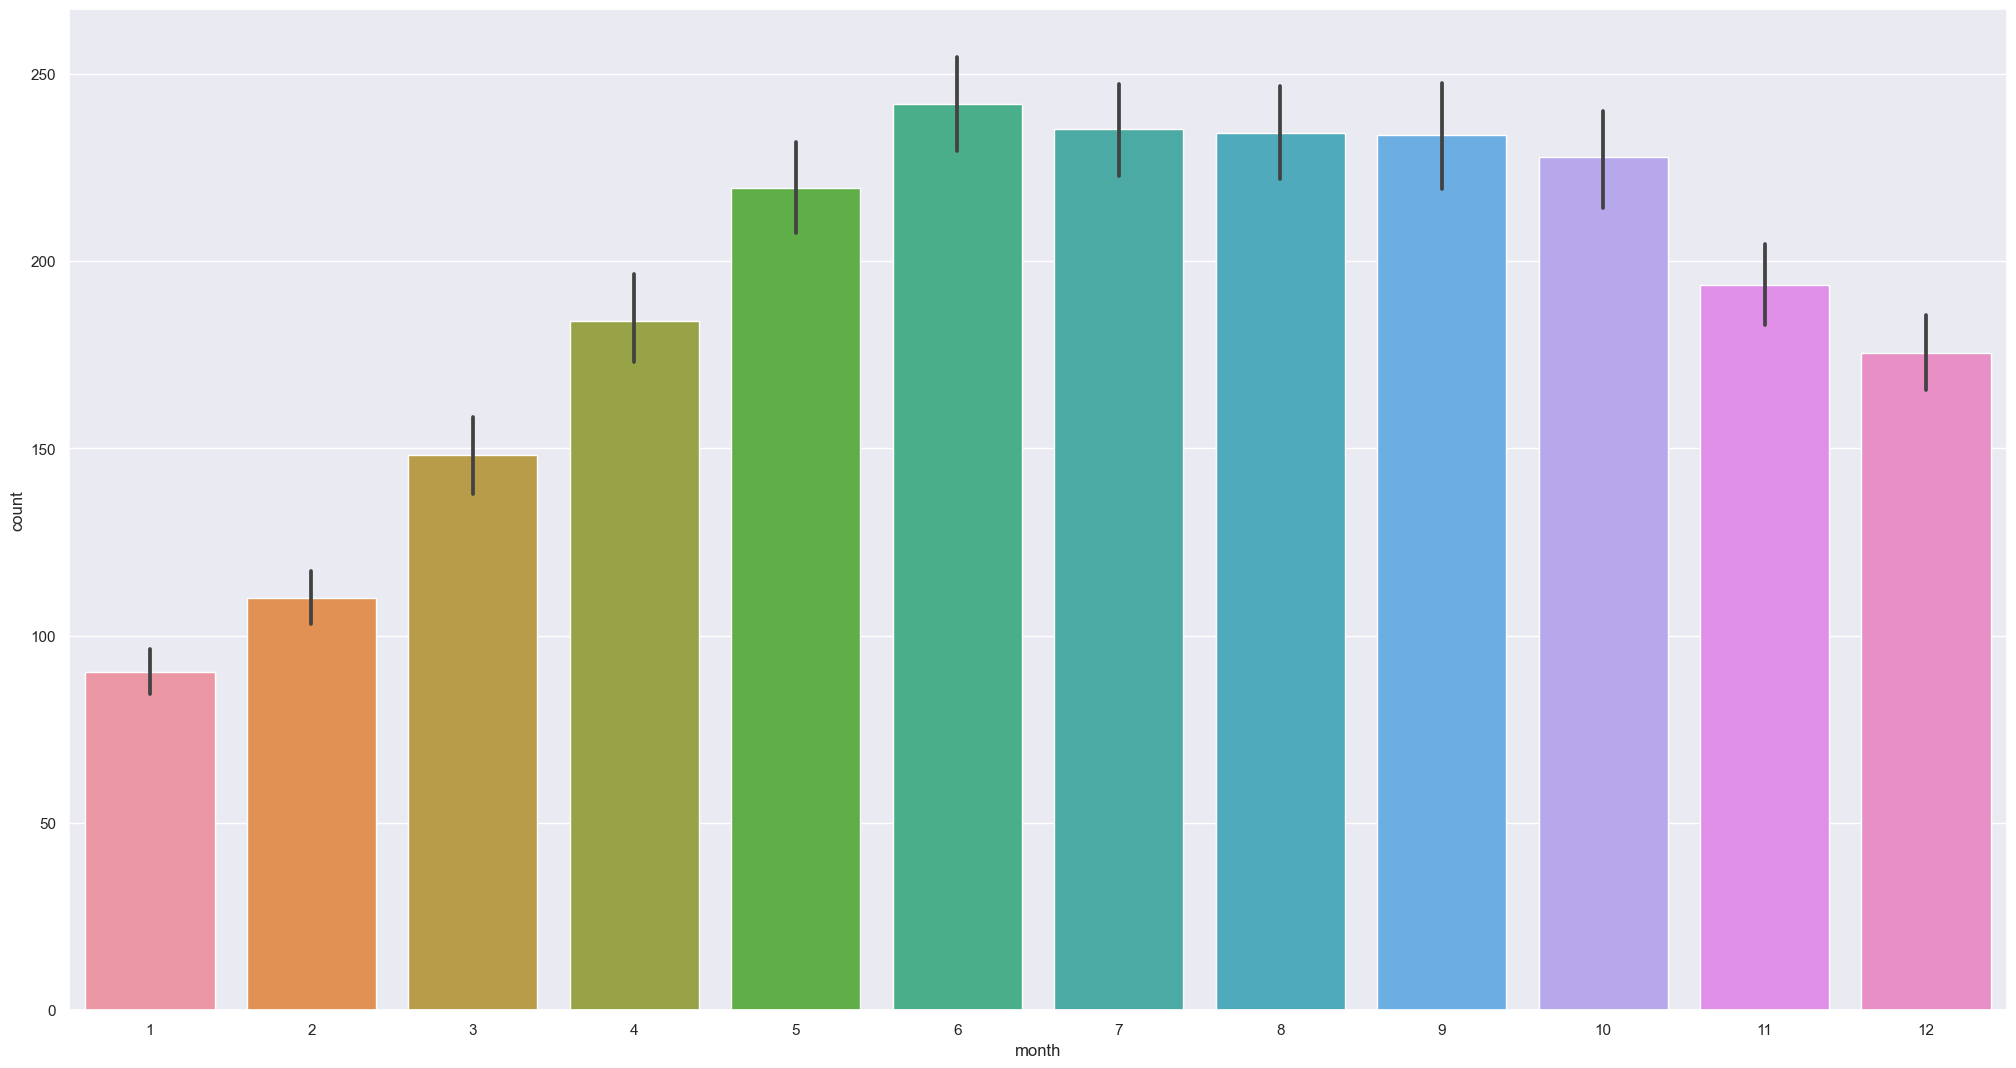

In [75]:
## 월 별로 확인

sns.barplot(data = df, x = 'month', y = 'count')

<Axes: xlabel='day', ylabel='count'>

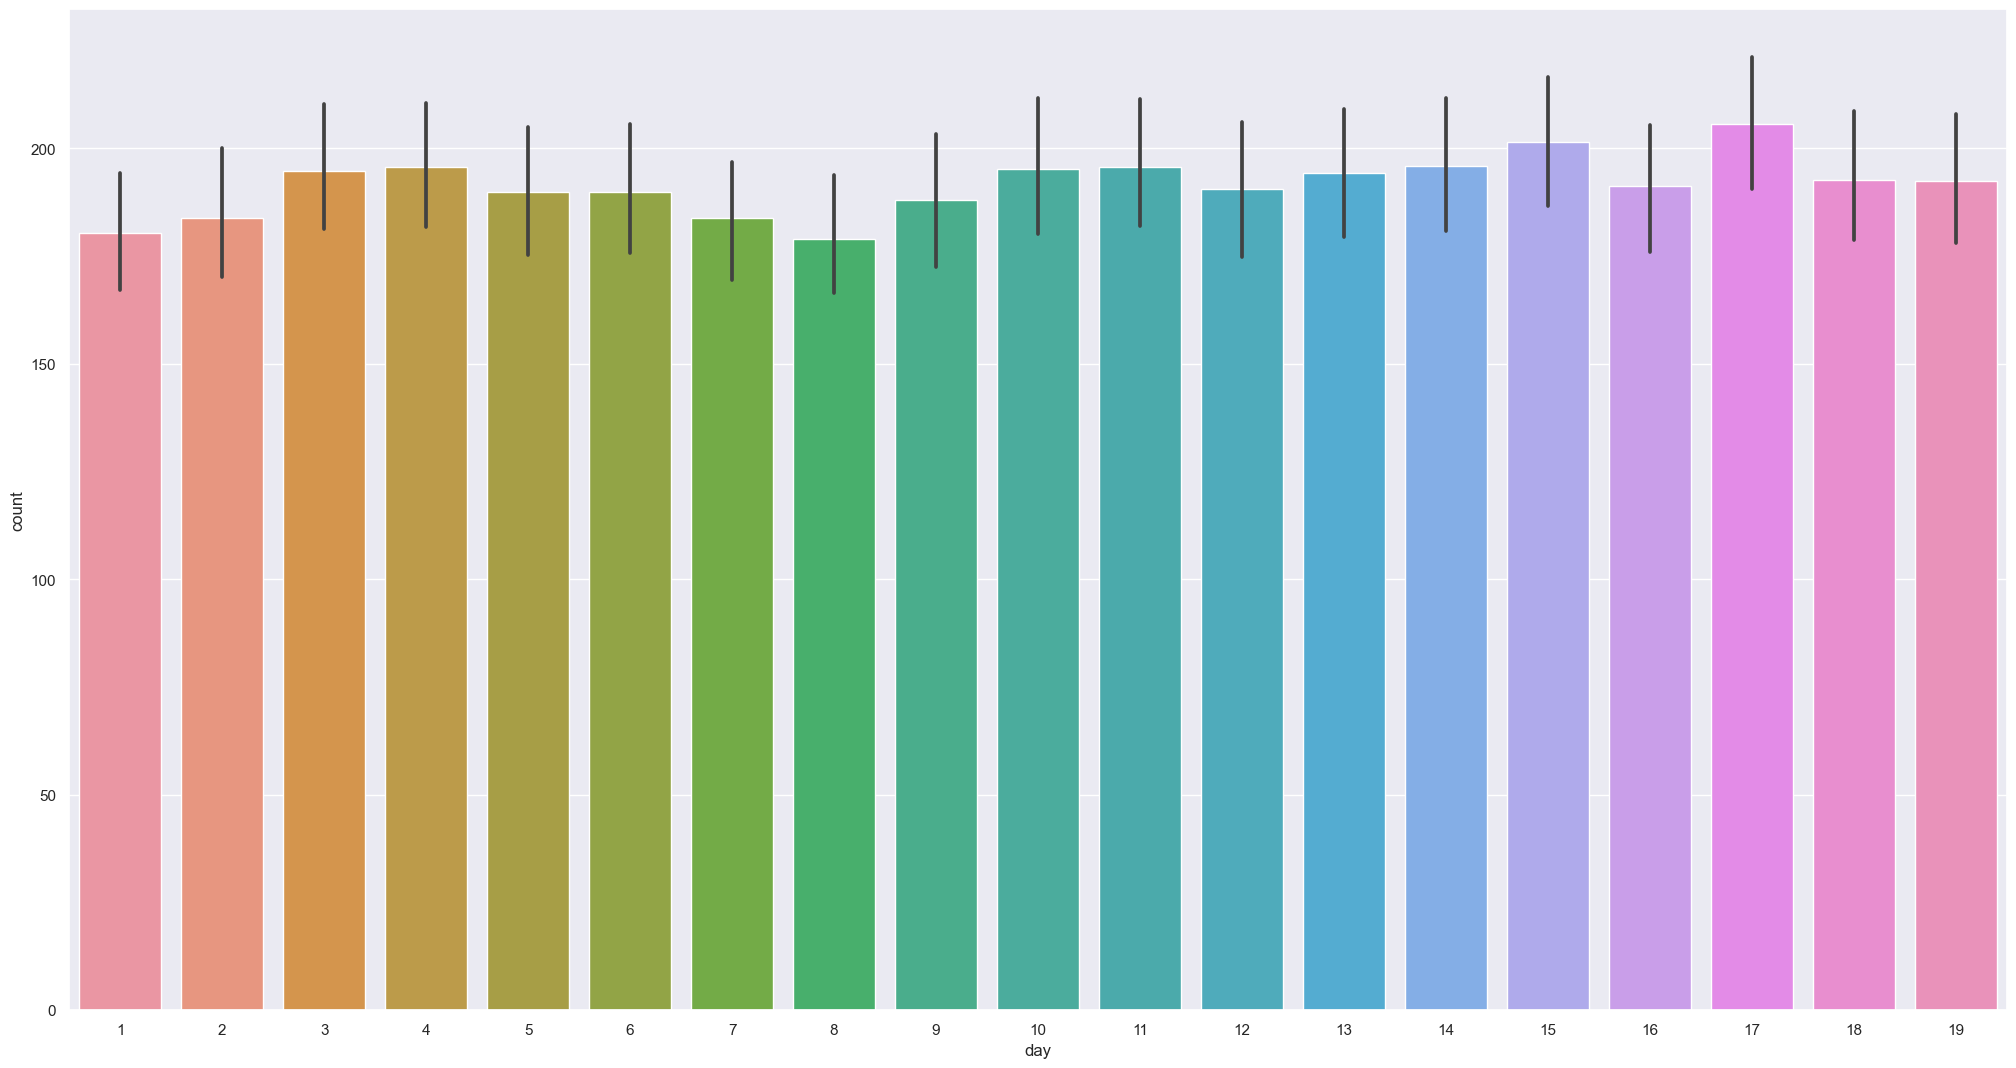

In [76]:
## 일 별로 확인
sns.barplot(data = df, x = 'day', y = 'count')

<Axes: xlabel='season', ylabel='count'>

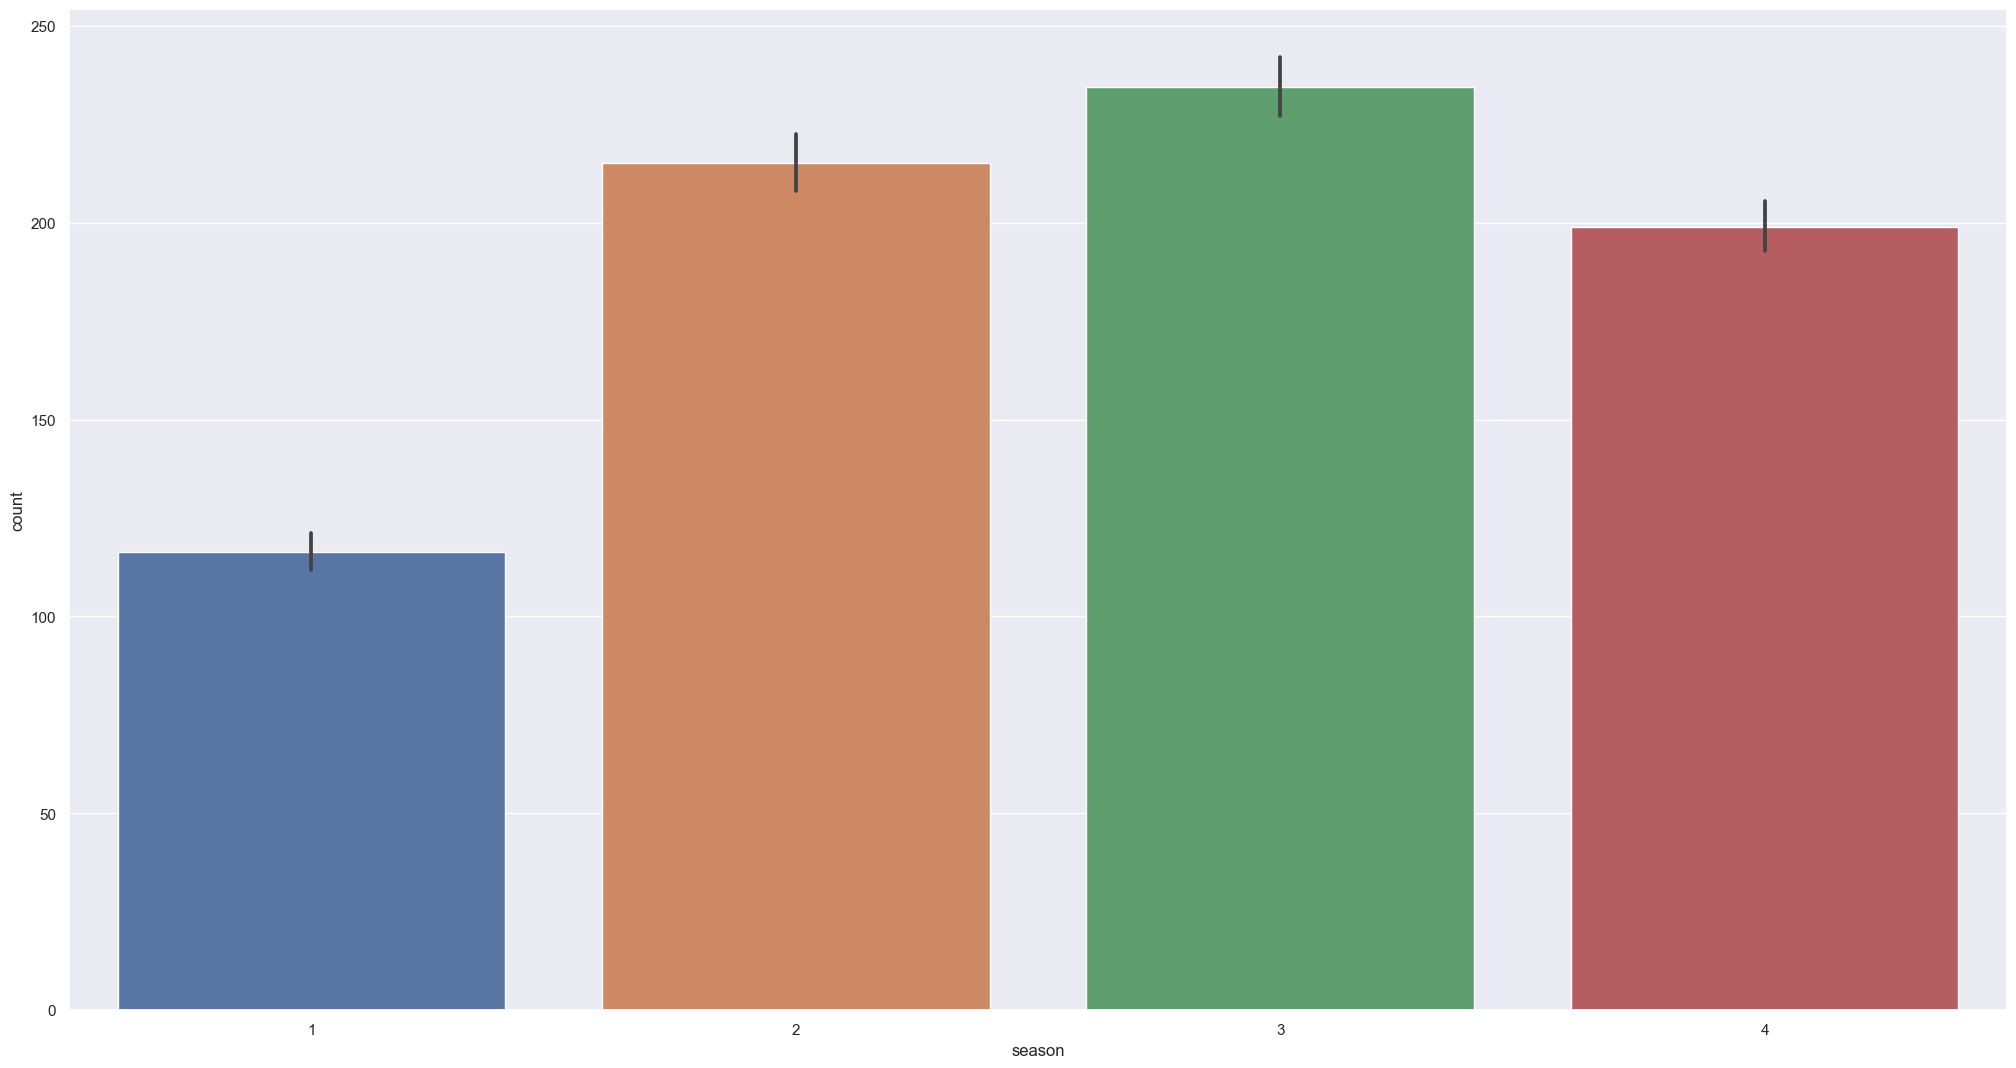

In [77]:
## 계절 별로 확인 (계절성이 있는 수요인가?)

sns.barplot(data = df, x = 'season', y = 'count')

<Axes: xlabel='hour', ylabel='count'>

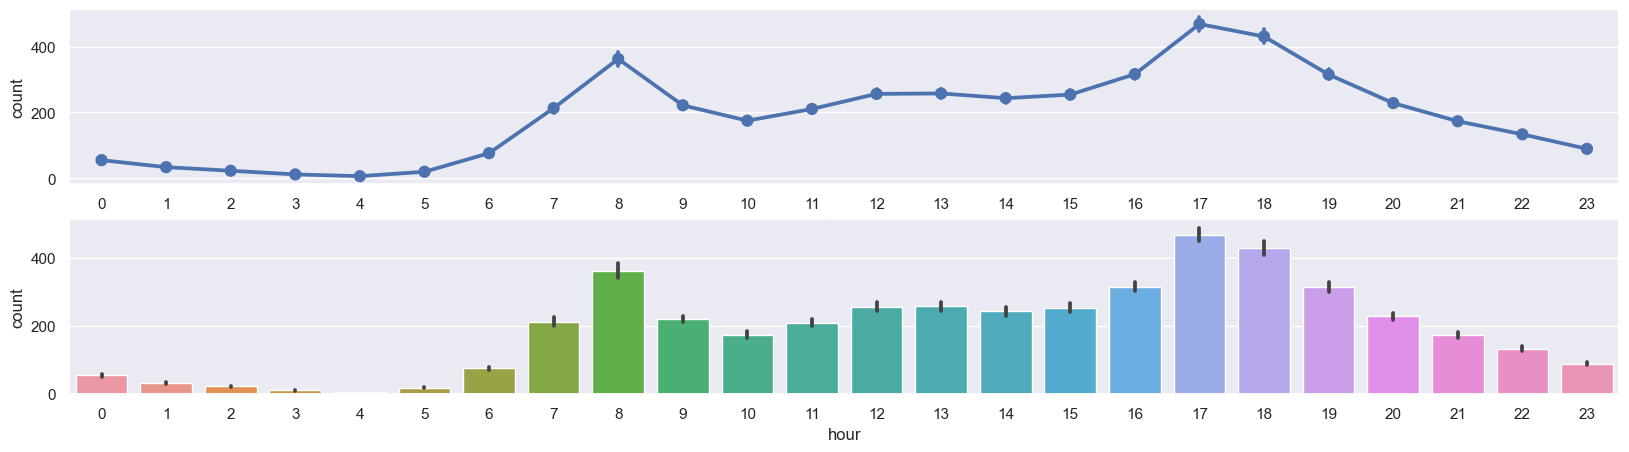

In [78]:
## 시간대별로 pointplot을 출력해본다 (시간대별 이용 추세 확인)

fig, (ax1, ax2) = plt.subplots(2, 1) # row, column
fig.set_size_inches(20, 5) # plot의 size 조정

sns.pointplot(data = df, x = 'hour', y = 'count', ax = ax1)
sns.barplot(data = df, x = 'hour', y ='count', ax = ax2)


<Axes: xlabel='hour', ylabel='count'>

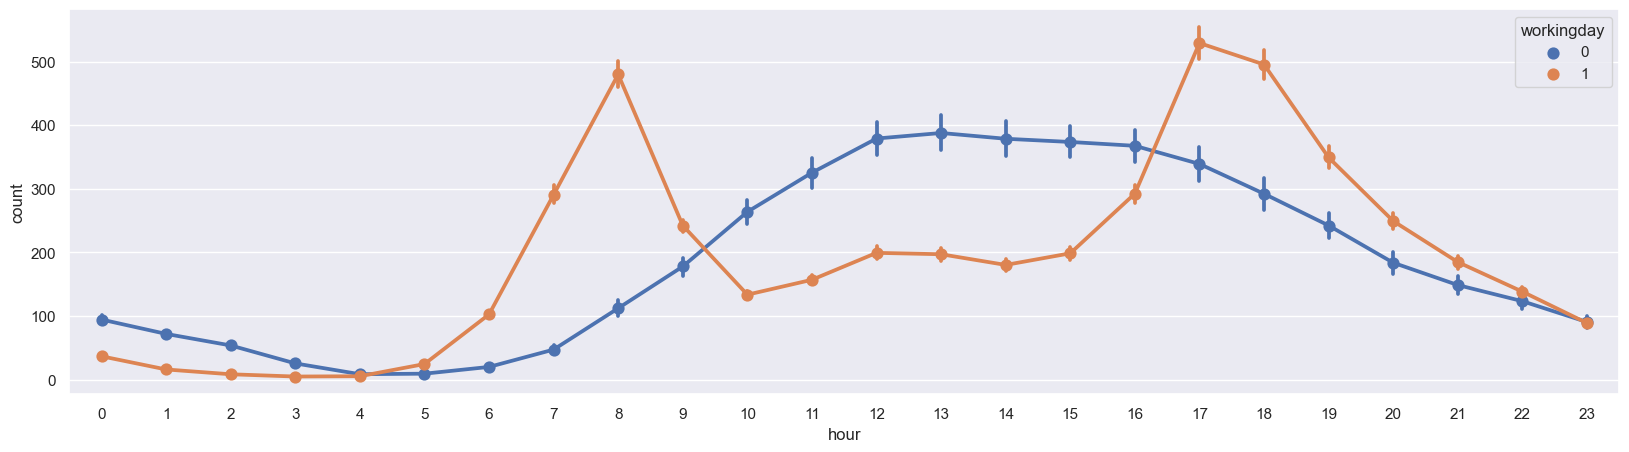

In [79]:
## 근무일에 따른 시간의 수요 변화 파악

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(20,5)
sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'workingday', ax= ax1)

<Axes: xlabel='hour', ylabel='count'>

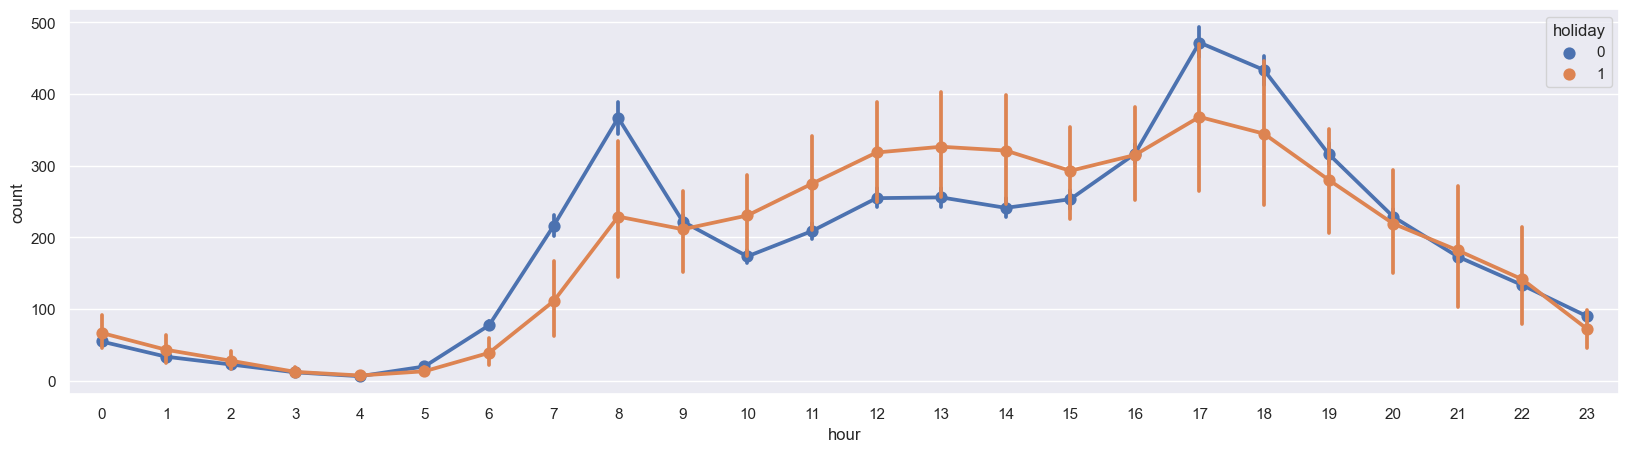

In [80]:
## 휴일에 따른 시간의 수요 변화 파악

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'holiday', ax =ax1)

<Axes: xlabel='hour', ylabel='count'>

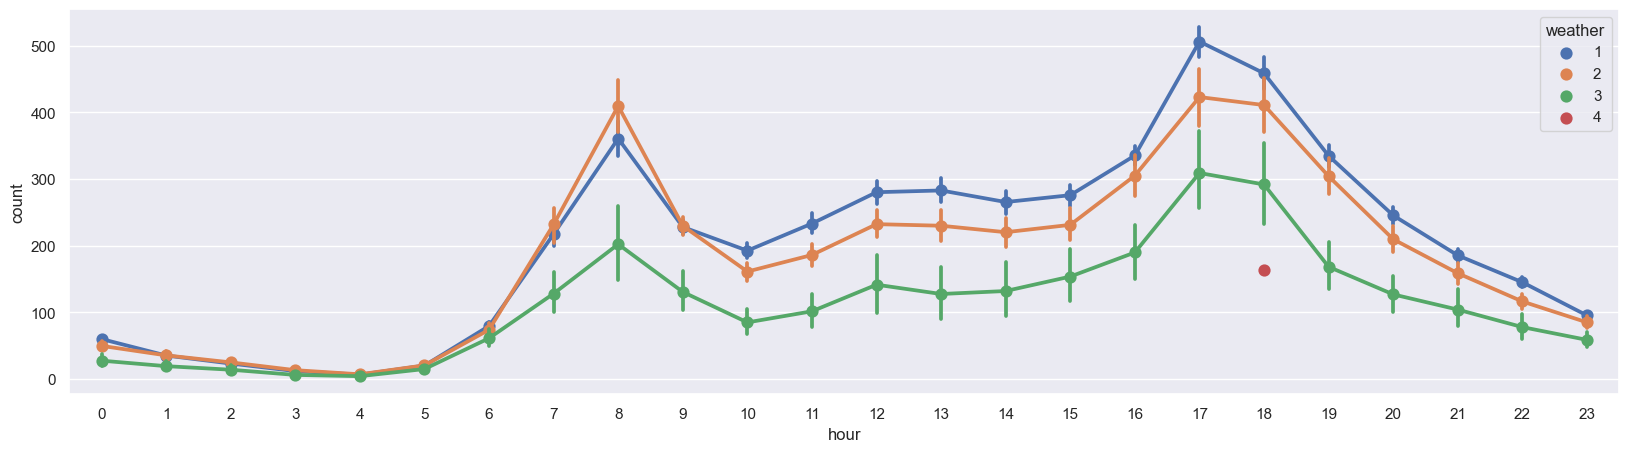

In [81]:
# 날씨에 따른 시간의 수요 변화 파악

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'weather', ax = ax1)

<Axes: xlabel='hour', ylabel='count'>

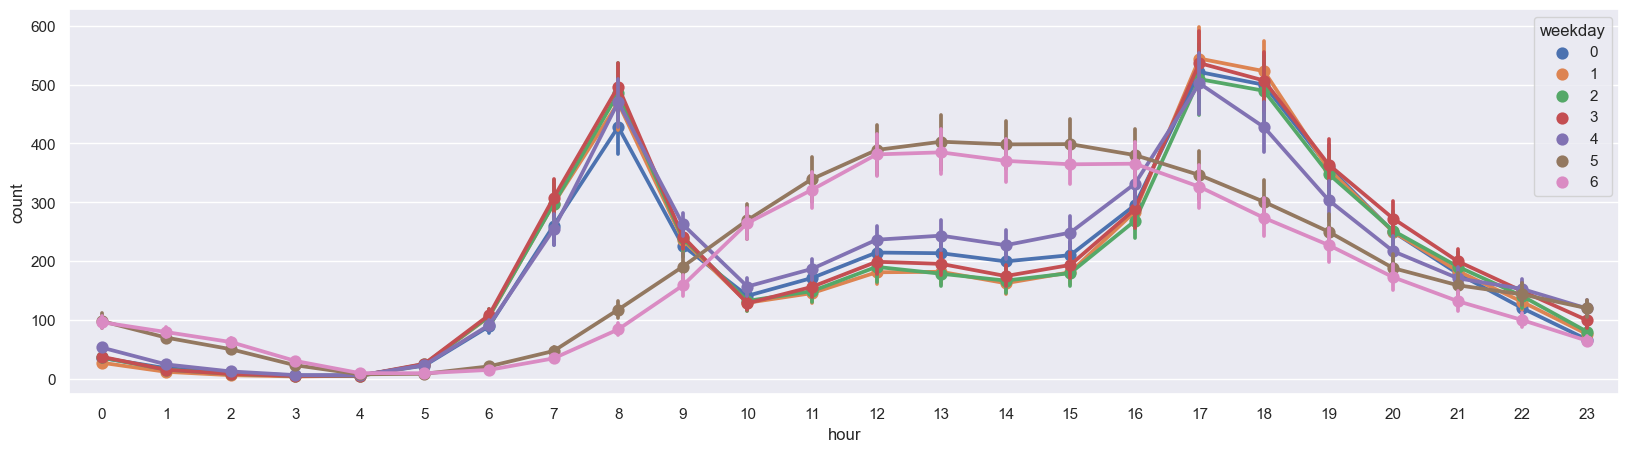

In [82]:
# 요일에 따른 시간의 수요 변화 파악

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data = df, x = 'hour', y = 'count', hue = 'weekday', ax = ax1)

<Axes: >

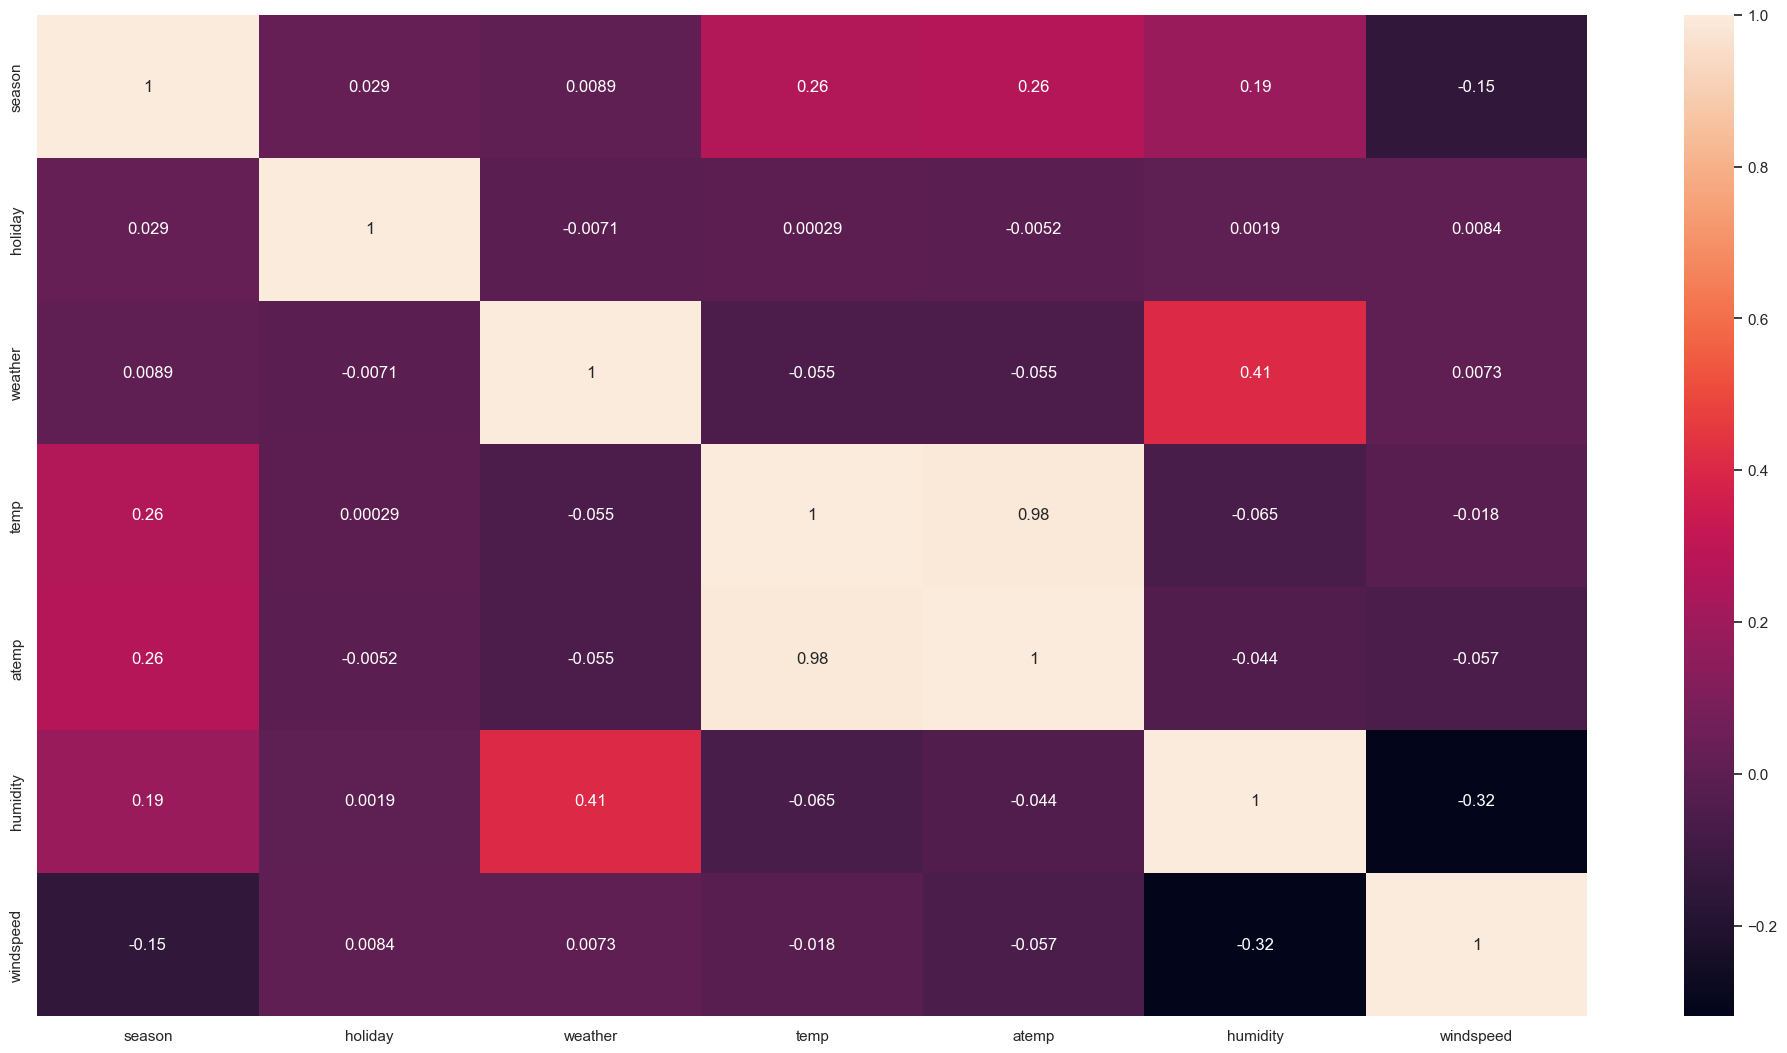

In [83]:
# 초기 데이터에 있던 column 만 뽑아서, multicolinearity 확인하는 작업
# -> 추후 모델의 overfitting을 방지하기 위함
# temp와 atemp의 공선성이 높으므로 temp만 사용할 것임

temp_data = df[['datetime', 'season', 'holiday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
sns.set(rc = {'figure.figsize' : (25, 13)})
sns.heatmap(temp_data.corr(), annot = True)

<Axes: xlabel='windspeed', ylabel='count'>

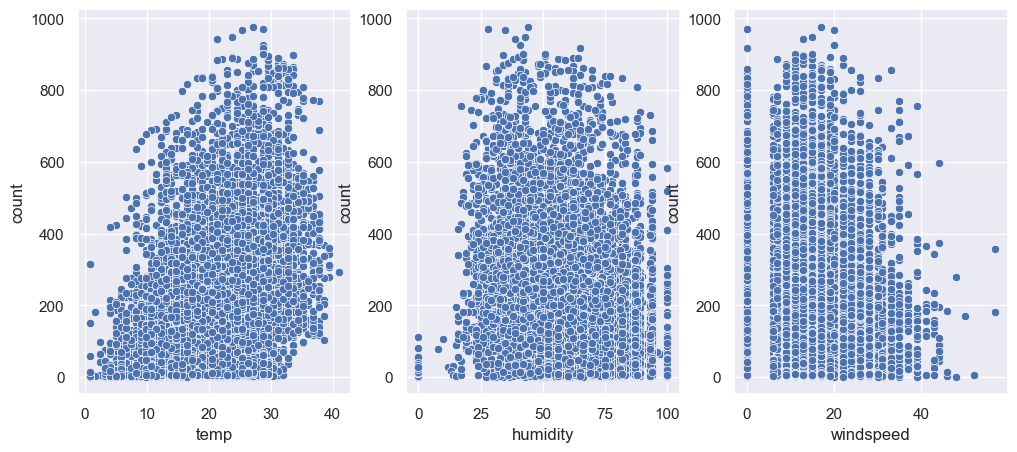

In [84]:
## 온도, 습도, 바람세기에 대한 산점도를 그려보고 분석해보기

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,5))

sns.scatterplot(data = df, x = 'temp', y = 'count', ax = ax1)
sns.scatterplot(data = df, x = 'humidity', y = 'count', ax = ax2)
sns.scatterplot(data = df, x = 'windspeed', y = 'count', ax = ax3)

In [85]:
## windspeed = 0 인 데이터를 찾아봄, 상식적으로 바람 속도가 0일 수는 없으니까
print(df[df['windspeed'] == 0].shape[0])

1313


<Axes: xlabel='count'>

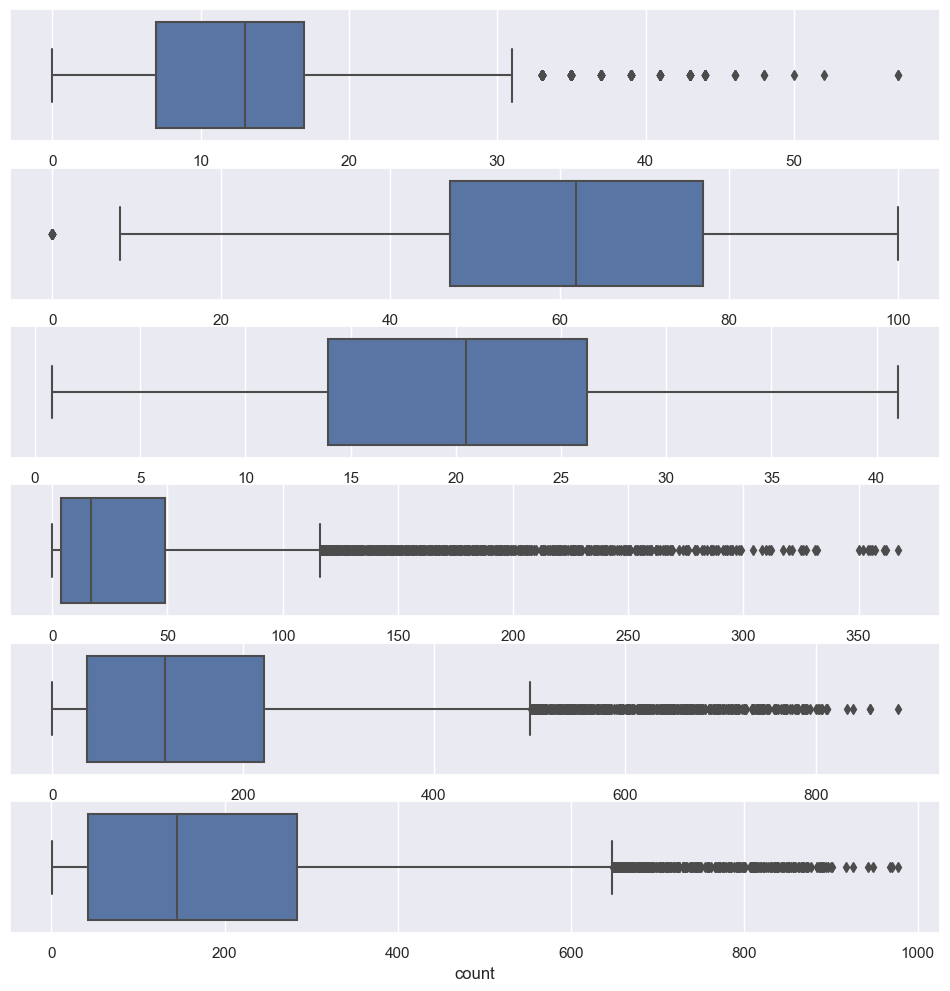

In [86]:
## 지금까지 해온 EDA를 기반으로 특성 공학을 진행

# boxplot을 그리고 이상치를 처리

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize = (12,12))
sns.boxplot(data = df, x = 'windspeed', ax = ax1)
sns.boxplot(data = df, x = 'humidity', ax = ax2)
sns.boxplot(data = df, x = 'temp', ax = ax3)
sns.boxplot(data = df, x = 'casual', ax = ax4)
sns.boxplot(data = df, x = 'registered', ax = ax5)
sns.boxplot(data = df, x = 'count', ax = ax6)


In [87]:
# IQR로 이상치를 삭제하는 함수
from collections import Counter

def detect_outliers(data, n, cols):
    outlier_index = []
    for i in cols:
        q1 = np.percentile(data[i], 25)
        q3 = np.percentile(data[i], 75)
        iqr = q3 - q1
        
        step = iqr * 1.5
        
        list_col = data[(data[i] < q1 - step) | (data[i] > q3 + step)].index
        outlier_index.extend(list_col)
    outlier_index = Counter(outlier_index)
    multiple_outliers = list(k for k, v in outlier_index.items() if v > n)
    
    return multiple_outliers

In [88]:
Outliers = detect_outliers(df, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])
df = df.drop(Outliers, axis = 0).reset_index(drop = True)

In [89]:
## 정규화를 해줄 변수를 찾아보기 위해 plotting 해보기
## 정규화에 쓰이는 함수 구현
## test data에도 정규화가 필요하니 캐시를 저장하는 작업을 수행해야 한다.

def Minmax_(X) :
    return (X - X.min(axis = 0)) / (X.max(axis= 0) - X.min(axis = 0)), X.max(axis =0) , X.min(axis =0)

### Z 정규화
def Standar_(X) :
    return (X - X.mean(axis =0)) / X.std(axis = 0), X.mean(axis =0), X.std(axis = 0)



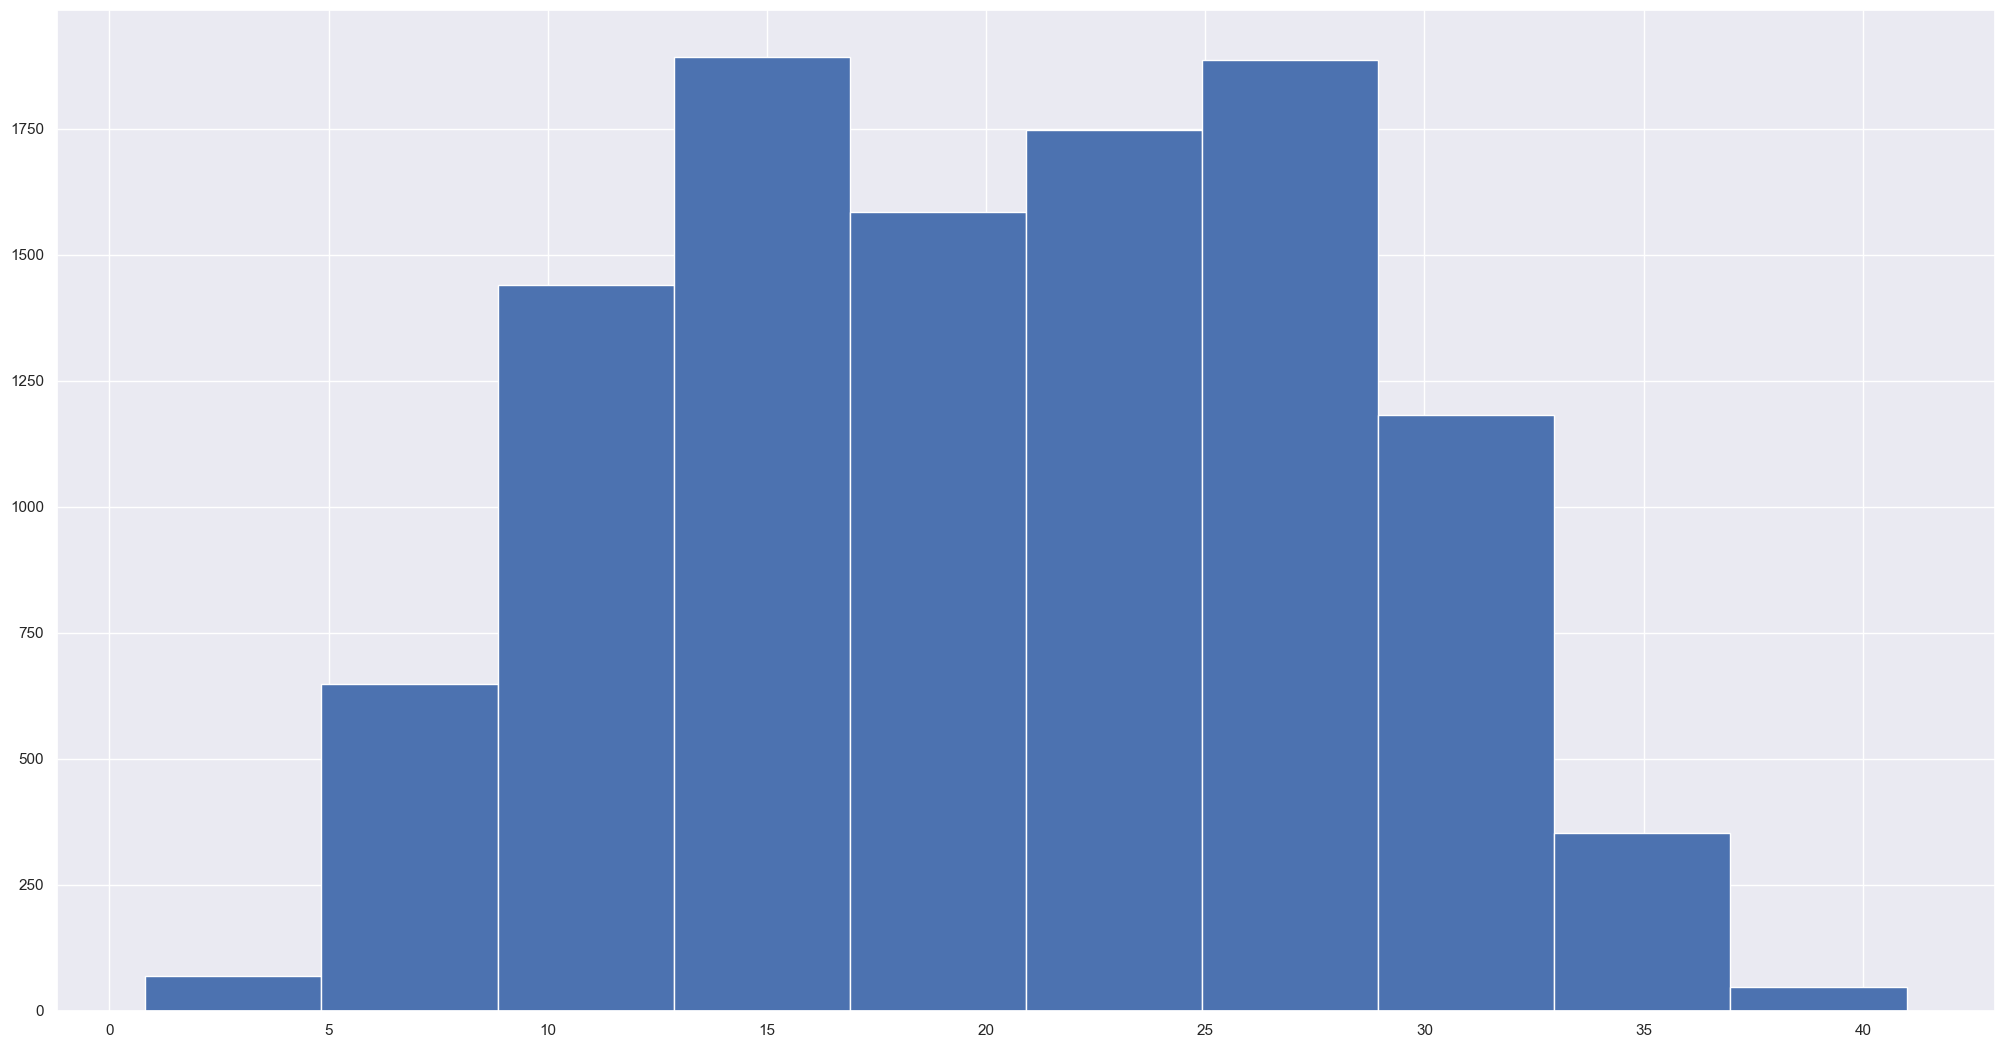

In [90]:
## temp
plt.hist(data = df, x = 'temp')
plt.show()

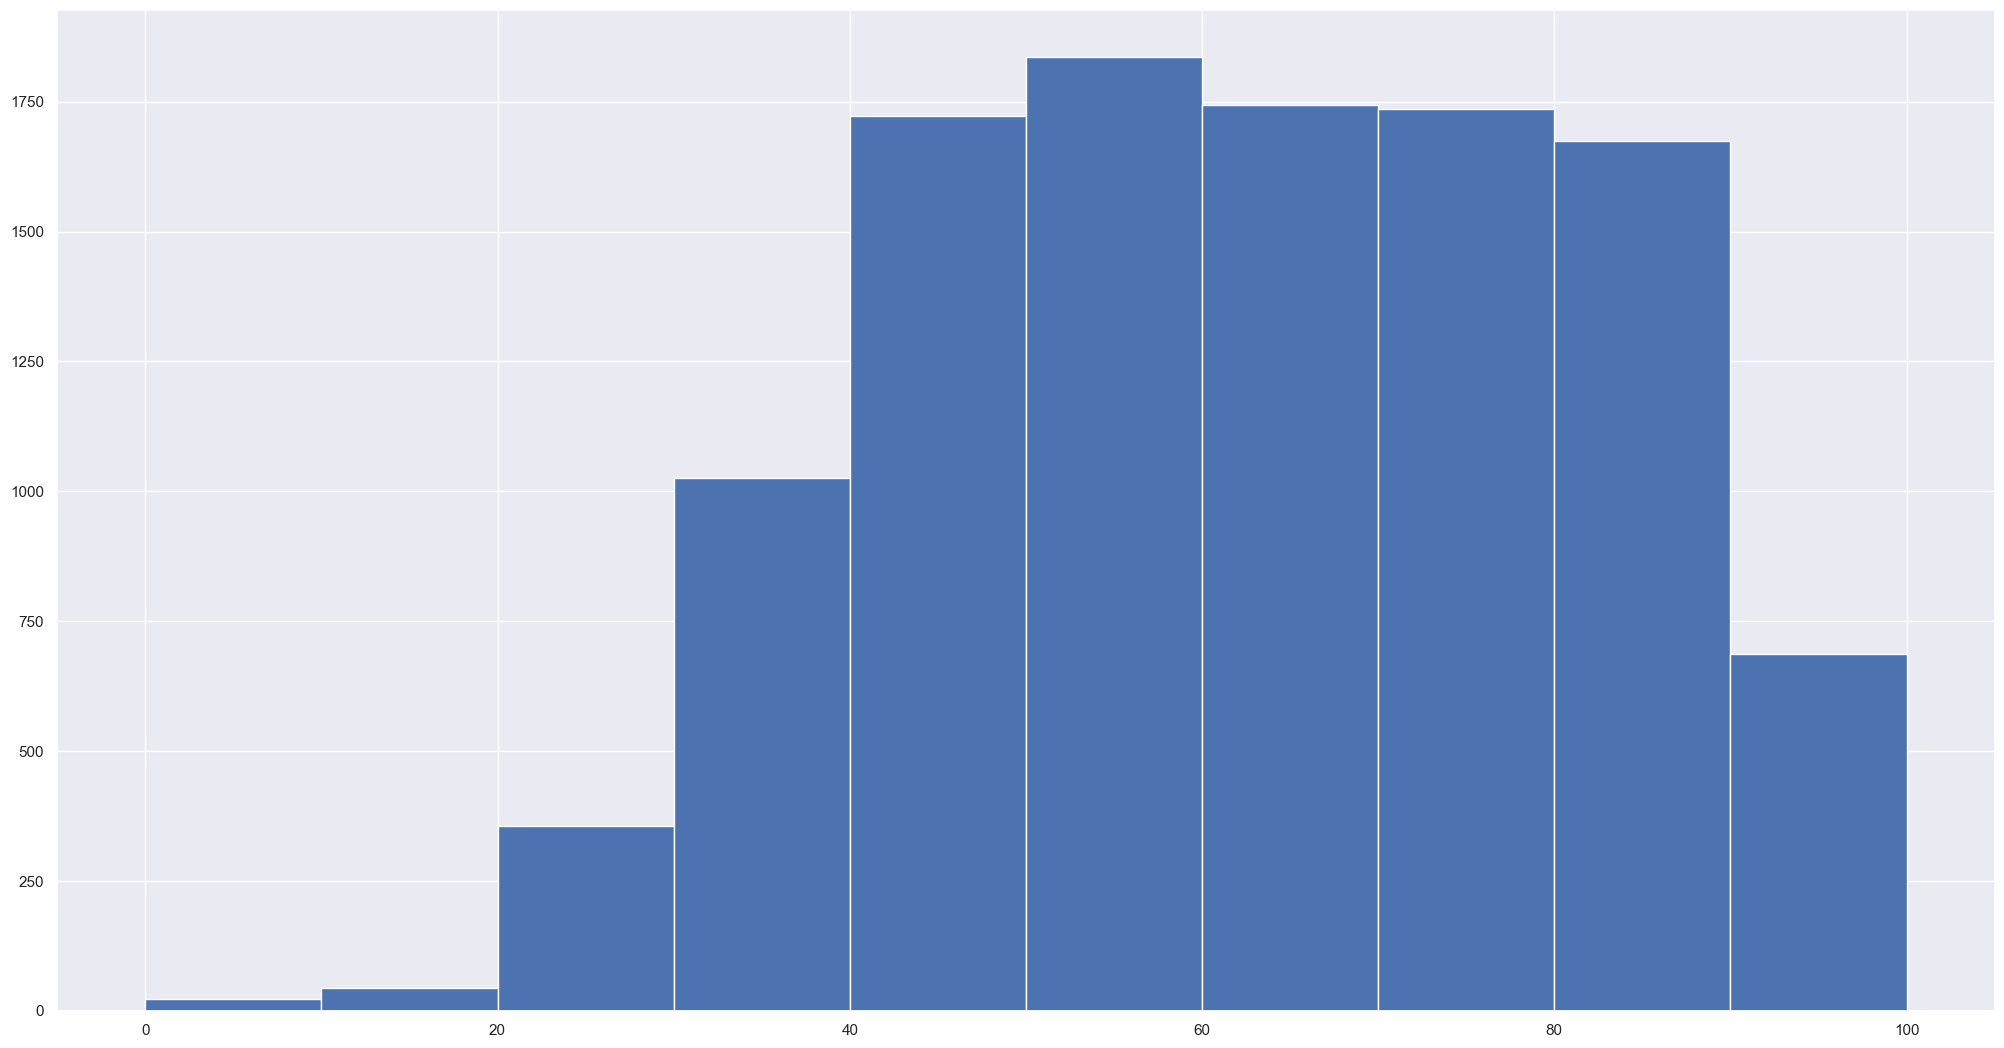

In [91]:
## humidity
plt.hist(data = df, x = 'humidity')
plt.show()

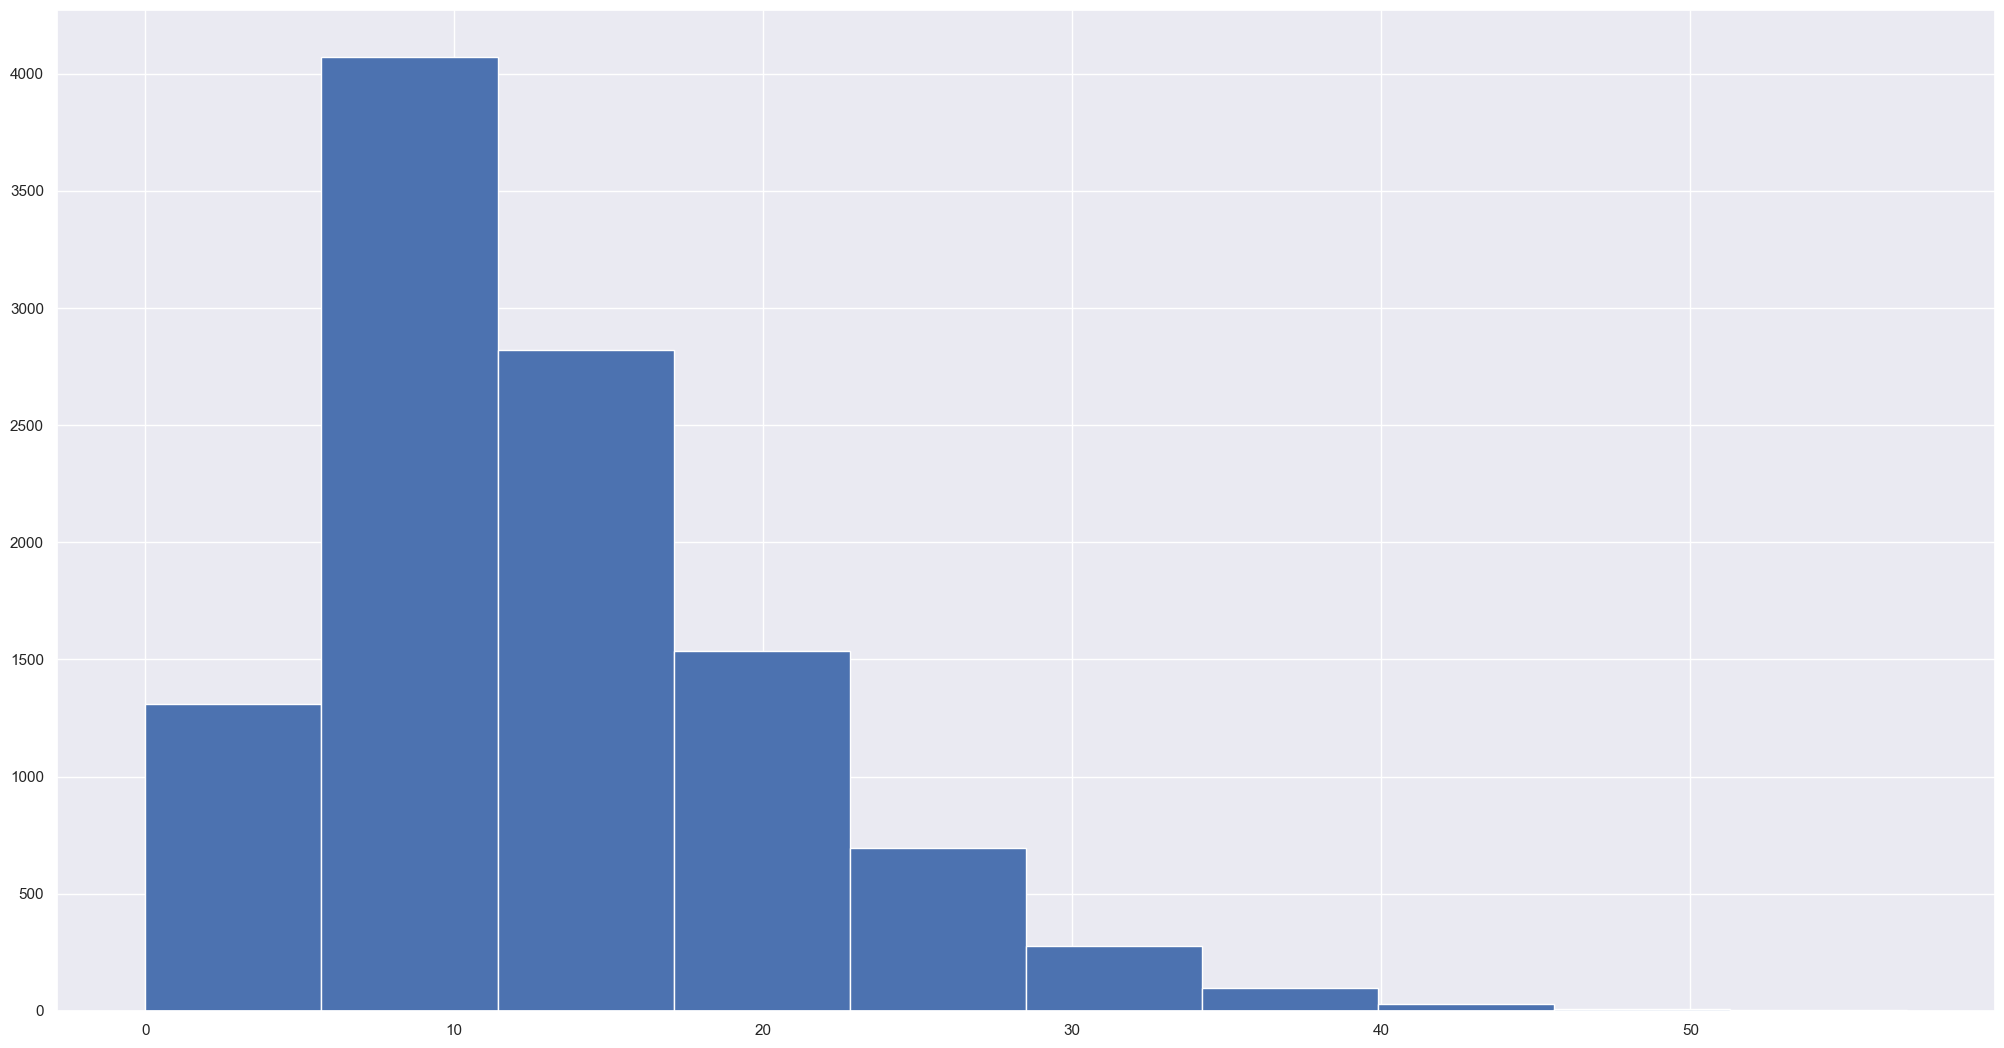

In [92]:
## windspeed
plt.hist(data = df, x = 'windspeed')
plt.show()

In [93]:
df.loc[df['windspeed'] == 0] # outlier 처리에서 다 마감 되었으니 의미없음

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,232,2012,12,17,12,0,0,0
10789,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,211,2012,12,17,15,0,0,0
10806,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0,10,652,662,2012,12,18,8,0,0,1
10820,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,132,2012,12,18,22,0,0,1


In [94]:
## one-hot encoding
df = pd.get_dummies(df, columns = ["weather"], prefix = "weather")

df = pd.get_dummies(df, columns = ["season"], prefix = "season")

In [95]:
# 지금까지의 데이터프레임
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10846 entries, 0 to 10845
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10846 non-null  datetime64[ns]
 1   holiday     10846 non-null  int64         
 2   workingday  10846 non-null  int64         
 3   temp        10846 non-null  float64       
 4   atemp       10846 non-null  float64       
 5   humidity    10846 non-null  int64         
 6   windspeed   10846 non-null  float64       
 7   casual      10846 non-null  int64         
 8   registered  10846 non-null  int64         
 9   count       10846 non-null  int64         
 10  year        10846 non-null  int64         
 11  month       10846 non-null  int64         
 12  day         10846 non-null  int64         
 13  hour        10846 non-null  int64         
 14  minute      10846 non-null  int64         
 15  second      10846 non-null  int64         
 16  weekday     10846 non-

<Axes: >

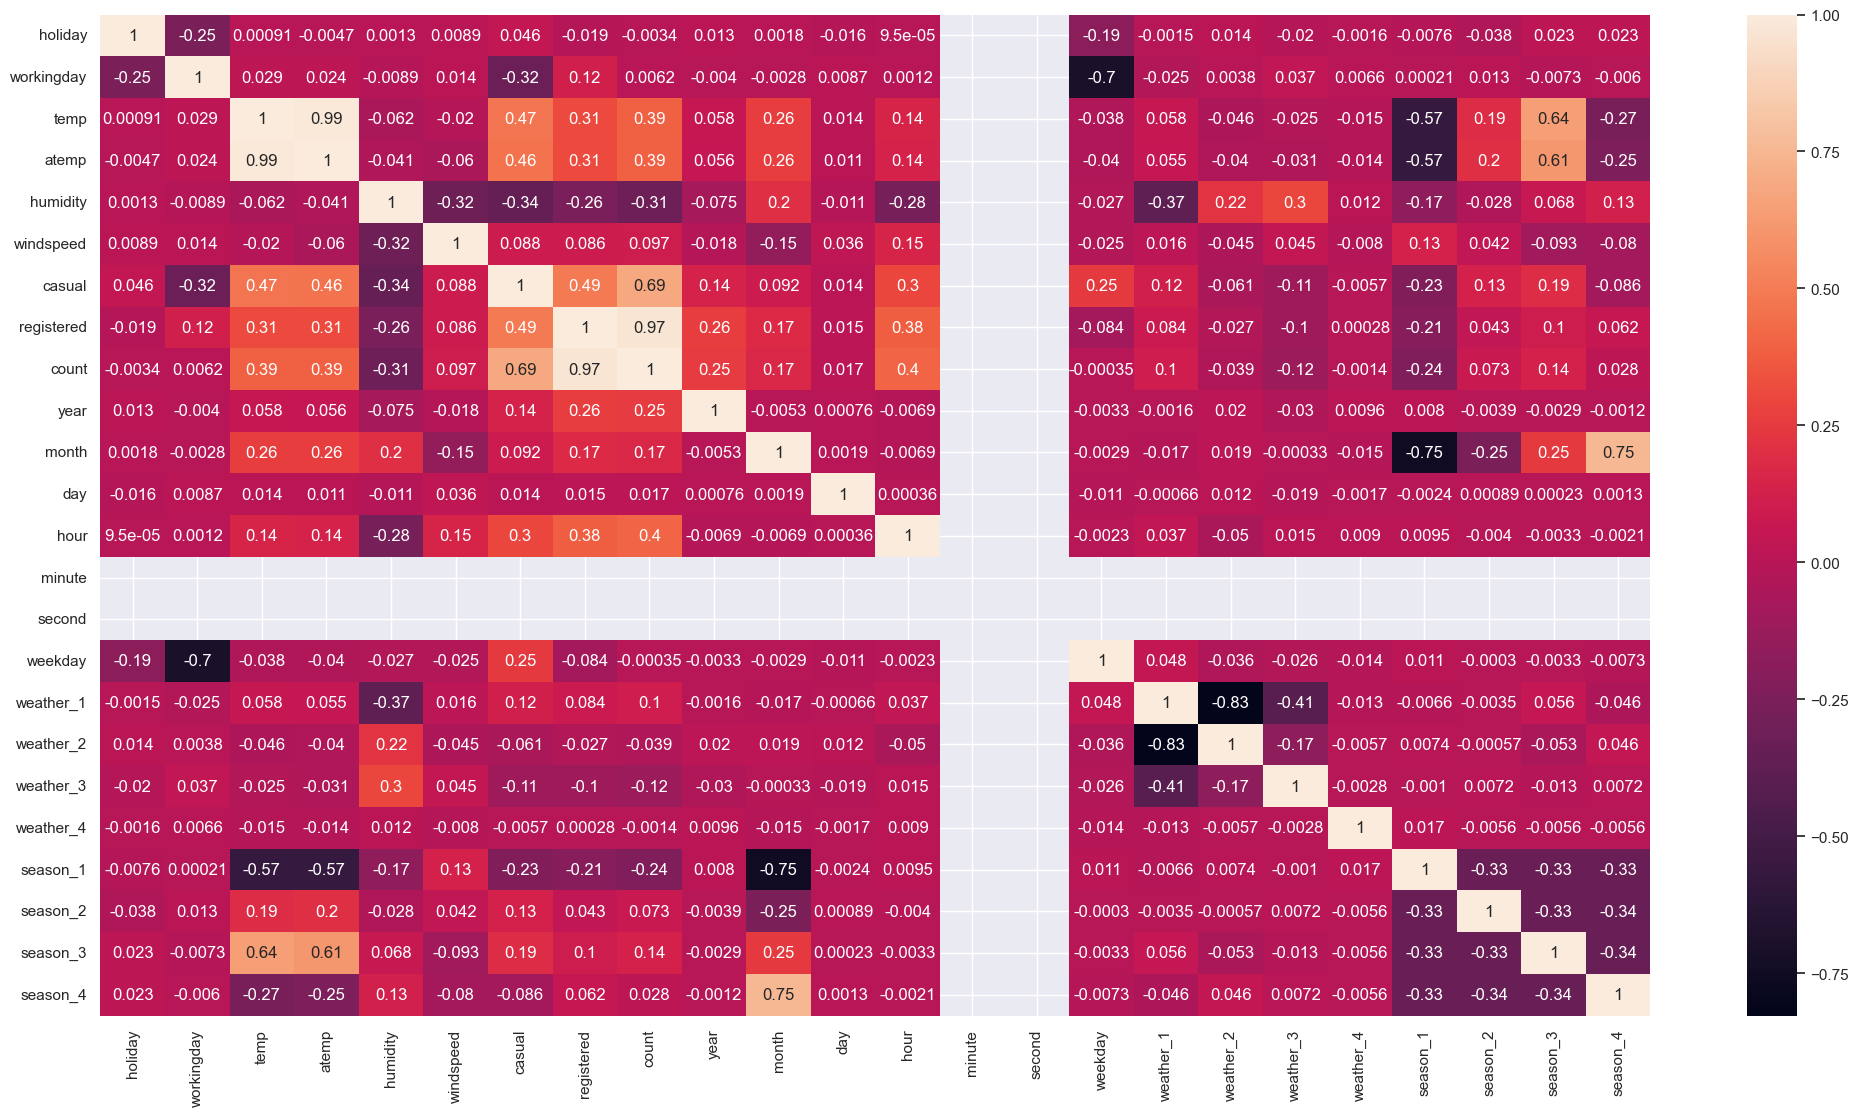

In [96]:
# 인코딩까지 끝났으니 이제 sns plotting 해서 확인

sns.set(rc = {'figure.figsize' : (25, 13)})
sns.heatmap(df.corr(), annot = True)

In [97]:
## atemp, casual, registered 날리고 구현
df = df.drop(["atemp", "casual", "registered", "datetime"], axis = 1)
df

,holiday,workingday,temp,humidity,windspeed,count,year,month,day,hour,...,second,weekday,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,81,0.0000,16,2011,1,1,0,...,0,5,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0000,40,2011,1,1,1,...,0,5,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0000,32,2011,1,1,2,...,0,5,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0000,13,2011,1,1,3,...,0,5,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0000,1,2011,1,1,4,...,0,5,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,0,1,15.58,50,26.0027,336,2012,12,19,19,...,0,2,1,0,0,0,0,0,0,1
10842,0,1,14.76,57,15.0013,241,2012,12,19,20,...,0,2,1,0,0,0,0,0,0,1
10843,0,1,13.94,61,15.0013,168,2012,12,19,21,...,0,2,1,0,0,0,0,0,0,1
10844,0,1,13.94,61,6.0032,129,2012,12,19,22,...,0,2,1,0,0,0,0,0,0,1


In [98]:
## data split
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df.drop("count", axis = 1)
y = df["count"]
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, y, test_size = 0.2, random_state = 13)

In [99]:
# !pip install xgboost

In [100]:
# ## xgboost 사용
# import xgboost as xgb
# xgb_model = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, subsample = 0.75, max_depth = 8)

# xgb_model.fit(X_tr, y_tr)

In [102]:
# ## 시험에선 이거 쓰자
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05, max_depth = 5, min_samples_leaf = 15, min_samples_split = 10, random_state = 42)

model.fit(X_tr, y_tr)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

In [104]:
# 오차 지표를 위함
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
def MAPE(y_pred, y_value):
    return np.mean(np.abs((y_value - y_pred) / y_value))*100 

def mean_absolute_error(y_pred, y_value):
    return np.mean(np.abs(y_pred-y_value))

def MSPE(y_pred, y_value):
    return np.mean(np.sqrt((y_value - y_pred) / y_value))*100 

def mean_squared_error(y_pred, y_value):
    return np.mean(np.sqrt(y_pred-y_value))

def root_mean_squared_log_error(y_pred, y_value):
    return np.sqrt(mean_squared_log_error(y_pred, y_value))

In [125]:
# test data도 특성공학 모두 거치고, 학습한 모델로 예측해보자.

def feature_engineering(df):
    ## 자전거의 수요량이 어느정도가 되어야 할지 예측하는 문제
    ## 우선 날짜별로 변화 인사이트를 확인하기 위해 datetime type으로 처리하고
    ## 년도, 월, 일, 시간 단위로 쪼개서 column 추가
    df['datetime'] = pd.to_datetime(df['datetime'])

    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['minute'] = df['datetime'].dt.minute
    df['second'] = df['datetime'].dt.second

    ## dt.dayofweek -> 날짜의 요일을 반환
    df['weekday'] = df['datetime'].dt.dayofweek
    
    Outliers = detect_outliers(df, 2, ["temp", "atemp", "humidity", "windspeed"])
    df = df.drop(Outliers, axis = 0).reset_index(drop = True)
    
    ## one-hot encoding
    df = pd.get_dummies(df, columns = ["weather"], prefix = "weather")
    df = pd.get_dummies(df, columns = ["season"], prefix = "season")
    
    df = df.drop(["atemp", "datetime"], axis = 1)
    
    return df

In [126]:
test_datetime = test_df['datetime']
test_df = feature_engineering(test_df)
test_df

,holiday,workingday,temp,humidity,windspeed,year,month,day,hour,minute,second,weekday,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,1,10.66,56,26.0027,2011,1,20,0,0,0,3,1,0,0,0,1,0,0,0
1,0,1,10.66,56,0.0000,2011,1,20,1,0,0,3,1,0,0,0,1,0,0,0
2,0,1,10.66,56,0.0000,2011,1,20,2,0,0,3,1,0,0,0,1,0,0,0
3,0,1,10.66,56,11.0014,2011,1,20,3,0,0,3,1,0,0,0,1,0,0,0
4,0,1,10.66,56,11.0014,2011,1,20,4,0,0,3,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,0,1,10.66,60,11.0014,2012,12,31,19,0,0,0,0,1,0,0,1,0,0,0
6489,0,1,10.66,60,11.0014,2012,12,31,20,0,0,0,0,1,0,0,1,0,0,0
6490,0,1,10.66,60,11.0014,2012,12,31,21,0,0,0,1,0,0,0,1,0,0,0
6491,0,1,10.66,56,8.9981,2012,12,31,22,0,0,0,1,0,0,0,1,0,0,0


In [127]:
test_y_pred = model.predict(test_df)
# print(test_df)

In [134]:
## 오차를 출력해보자
# rmsle
# test_y_pred 중 음수나 0은 1로 처리


submission = pd.DataFrame()
submission['datetime'] = test_datetime
submission['count'] = test_y_pred
submission

,datetime,count
0,2011-01-20 00:00:00,19.506299
1,2011-01-20 01:00:00,-1.090032
2,2011-01-20 02:00:00,-4.226665
3,2011-01-20 03:00:00,-3.868218
4,2011-01-20 04:00:00,-3.865607
...,...,...
6488,2012-12-31 19:00:00,325.613331
6489,2012-12-31 20:00:00,204.218131
6490,2012-12-31 21:00:00,144.066905
6491,2012-12-31 22:00:00,90.178420


In [135]:

for i in range(0, submission.shape[0]):
    if submission.loc[i, 'count'] <= 0.0:
        submission.loc[i, 'count'] = 1

In [136]:
submission

,datetime,count
0,2011-01-20 00:00:00,19.506299
1,2011-01-20 01:00:00,1.000000
2,2011-01-20 02:00:00,1.000000
3,2011-01-20 03:00:00,1.000000
4,2011-01-20 04:00:00,1.000000
...,...,...
6488,2012-12-31 19:00:00,325.613331
6489,2012-12-31 20:00:00,204.218131
6490,2012-12-31 21:00:00,144.066905
6491,2012-12-31 22:00:00,90.178420


In [137]:
submission.to_csv("C:/Users/nha98/Desktop/regression_practice/Bike.csv", index = False)